## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statement


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [8]:
import pandas as pd
df = pd.read_csv('QueryResults.csv')


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,83
4,2008-08-01 00:00:00,python,122


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [10]:
df.shape

(2230, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [11]:
count = df.count()
print(count)

m             2230
TagName       2230
Unnamed: 2    2230
dtype: int64


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [12]:
print(df.groupby("TagName").sum())


            Unnamed: 2
TagName               
assembly         39192
c               370983
c#             1512951
c++             748323
delphi           48967
go               58193
java           1815420
javascript     2310404
perl             66232
php            1421719
python         1854374
r               430272
ruby            222144
swift           306165


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [13]:
grouped = df.groupby("TagName").count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [14]:
df.m = pd.to_datetime(df.m)
df.head()

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,83
4,2008-08-01,python,122


## Data Manipulation



In [19]:
reshaped_df = df.pivot(index='m', columns='TagName', values='Unnamed: 2')
print(reshaped_df.shape)
print(reshaped_df.head())
new_reshaped_df = reshaped_df.fillna(0)
new_reshaped_df

(162, 14)
TagName     assembly      c      c#    c++  delphi  go    java  javascript  \
m                                                                            
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   507.0  163.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  320.0  1648.0  754.0   105.0 NaN  1136.0       639.0   
2008-10-01      15.0  303.0  1990.0  810.0   112.0 NaN  1154.0       726.0   
2008-11-01      17.0  259.0  1733.0  734.0   141.0 NaN   958.0       579.0   

TagName      perl    php  python    r   ruby  swift  
m                                                    
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  160.0   122.0  NaN   71.0    NaN  
2008-09-01  131.0  480.0   538.0  6.0  288.0    NaN  
2008-10-01  127.0  615.0   508.0  NaN  249.0    NaN  
2008-11-01   97.0  502.0   452.0  1.0  159.0    NaN  


TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
m,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,507.0,163.0,14.0,0.0,222.0,163.0,28.0,160.0,122.0,0.0,71.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,538.0,6.0,288.0,0.0
2008-10-01,15.0,303.0,1990.0,810.0,112.0,0.0,1154.0,726.0,127.0,615.0,508.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,502.0,452.0,1.0,159.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,166.0,1620.0,5757.0,3478.0,141.0,784.0,7945.0,17034.0,118.0,4584.0,23106.0,4573.0,508.0,2193.0
2021-09-01,197.0,1804.0,5761.0,3919.0,143.0,659.0,7801.0,16682.0,114.0,4316.0,21951.0,4329.0,507.0,1938.0
2021-10-01,223.0,2208.0,6051.0,4091.0,150.0,761.0,7804.0,16255.0,131.0,4297.0,22999.0,4751.0,480.0,1852.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

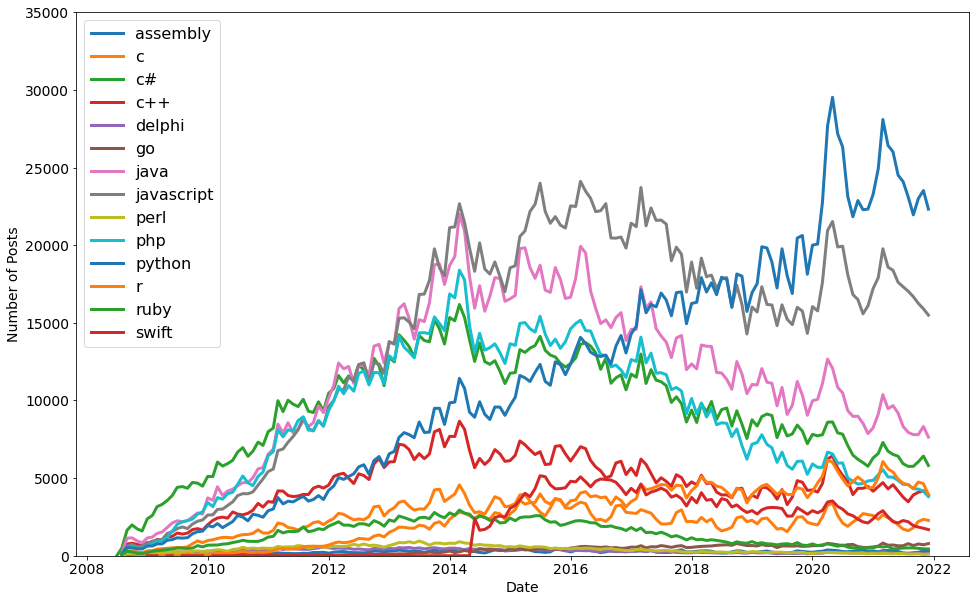

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
#
# plt.plot(reshaped_df.index, reshaped_df.java, reshaped_df.python)
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)



plt.legend(fontsize=16)


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

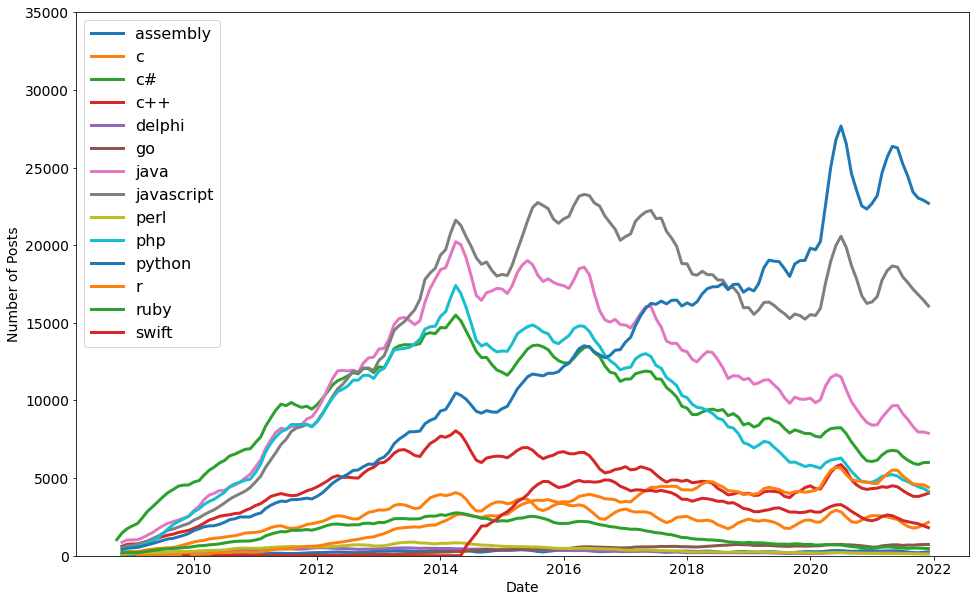

In [70]:
import matplotlib.pyplot as plt

roll_df = reshaped_df.rolling(window=4). mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)


plt.legend(fontsize=16)
